# Plotting the linear attenuation $\mu$ as a function of atomic number, Z.

The purpose of this python notebook is to analyse your experimental count rate measurements taken of x-rays passing through absorbers of the same thickness (x=0.05mm), but different atomic numbers, Z. As part of this analysis you'll be graphing your experimental data measured with and without the Zr filter. You'll start by importing the necessary modules into python for graphing.

Step 1. Import numpy and pyplot from matlibplot.

In [5]:
#you can just run this cell
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Measurements taken with Zr filter 

Step 2. Enter your experimental data from Table 2 measured WITH the zirconium filter. Make sure each of the 1-d arrays contain the same number of entries as each other.

In [6]:
#enter Z number data
Znumber=np.array([0,6,13,26,29,40,47])
#Enter the raw mean count rate with Zr filter
rawR_Zr=np.array([614.4,583.,320.2,42.48,4.57,79.04,21.87])
#enter its uncertainty
sigmaRawR_Zr=np.array([4.53,4.41,3.27,0.38,0.12,0.51,0.27])

Step 3. Enter the background count rate and its uncertainty. (This should have been measured over 300 seconds.)

In [7]:
#input mean background count rate
Rb=0.193
#input uncertainty in background count rate
sigmaRb=0.025

Step 4. You are now going to calculate the transmission fractions for each absorber using Equation (1a) from the lab manual. The value of $R_0$ in the equation is the mean count rate when there was no absorber, which should correspond to the largest count rate measured.

In [8]:
R0_Zr=rawR_Zr.max()
sigmaR0_Zr=sigmaRawR_Zr[rawR_Zr==R0_Zr]
#Calculate transmission measured with Zr filter (Equation (1a))
TZr=(rawR_Zr-Rb)/(R0_Zr-Rb)
#Complete using above equation to calculate transmission measured with Zr filter
TZr=(rawR_Zr-Rb)/(R0_Zr-Rb)

Step 5. Now use Equation (3) to calculate the linear attenuation for each absorber, knowing that each was 0.05mm thick.

In [9]:
#Taking the natural log of the transmission.
lnTZr=np.log(TZr)
#Enter the thickness of each absorber in mm.
thickness=0.5
#Complete using Equation (3)
mu_Zr= - lnTZr/thickness

Step 6. Next you are going to estimate the uncertainty in the linear attenuation for each absorber. You can assume no uncertainty in the thickness of the absorbers, so from Equation (3) this means,

$\sigma_{\mu}=\sqrt{(\frac{\partial \mu}{\partial \ln{T}}\sigma_{\ln{T}})^2}\\
\sigma_{\mu}=\frac{\partial \mu}{\partial \ln{T}}\sigma_{\ln{T}}.$


Given your experience of calculating the uncertainty in the natural log of the transmission from the uncertainty in the count rates (see XrayAbsorption_AluminiuThickness_Analysis-SV.ipynb), you should be able to follow this calculation of the uncertainty $\sigma_{\mu}$.


In [10]:
#you can just run this cell
partialR=1.0/(rawR_Zr-Rb)
partialR0=-1.0/(R0_Zr-Rb)
partialRb=1.0/(R0_Zr-Rb)-1.0/(rawR_Zr-Rb)
sigmalnTZr=np.sqrt((partialR*sigmaRawR_Zr)**2+(partialR0*sigmaR0_Zr)**2+(partialRb*sigmaRb)**2)
sigmaMuZr=-sigmalnTZr/thickness

Step 7. Make an initial plot of $\mu$ as a function of atomic number $Z$. Make sure to display uncertainties.

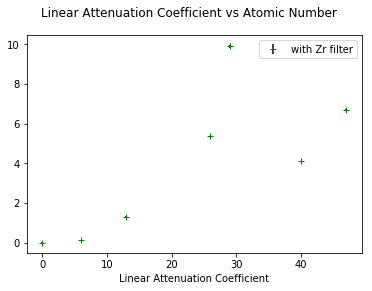

In [12]:
#complete the following
plt.errorbar(Znumber, mu_Zr, yerr=sigmaMuZr,ls="none",marker="+",c="g",ecolor="k",label='with Zr filter')
#add axes labels
plt.xlabel("Atomic Number")
plt.xlabel("Linear Attenuation Coefficient")             
#add title
plt.suptitle("Linear Attenuation Coefficient vs Atomic Number")
#add legend
plt.legend()              

## Measurements taken without Zr filter 

Now repeat steps 2,4,5 and 6 with your experimental data taken WITHOUT the Zr filter.

In [13]:
#Step 2
#enter the raw mean count rate measured without Zr filter
rawR_noZr=np.array([1640.,1598.,983.9,132.7,12.2,135.5,100.])
#enter its associated uncertainty
sigmaRawR_noZr=np.array([7.39,7.3,5.73,0.67,0.2,0.67,0.58])

In [14]:
#Step 4 - get the maximum raw count rate without an absorber present, and its uncertainty
R0_noZr=rawR_noZr.max()
sigmaR0_noZr=sigmaR0_noZr=sigmaRawR_noZr[rawR_noZr==R0_noZr]
#Calculate transmission measured without Zr filter using Equation (1a)
T_noZr=(rawR_noZr-Rb)/(R0_noZr-Rb)
#Complete using above equation to calculate transmission measured with Zr filter
TZr=(rawR_Zr-Rb)/(R0_Zr-Rb)

In [15]:
#Step 5
#Now take the natural log of the transmission.
lnT_noZr=np.log(T_noZr)
#Calculate mu using Equation (3) from notes
mu_noZr=- lnT_noZr/thickness

In [16]:
#Step 6 - calculating uncertainty in mu_noZr
#you can just run this cell
partialR_noZr=1.0/(rawR_noZr-Rb)
partialR0_noZr=-1.0/(R0_noZr-Rb)
partialRb_noZr=1.0/(R0_noZr-Rb)-1.0/(rawR_noZr-Rb)
sigmalnT_noZr=np.sqrt((partialR_noZr*sigmaRawR_noZr)**2+(partialRb_noZr*sigmaRb)**2)
sigmaMu_noZr=-sigmalnT_noZr/thickness

Plot both sets of experimental results (with and without Zr filter) on the same graph, with their respective labels. Then save figure to a pdf file.

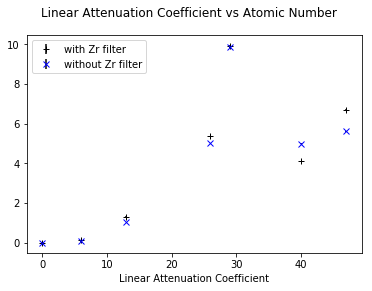

In [23]:
#plot of mu_Zr as a function of Znumber and label
plt.errorbar(Znumber,mu_Zr,yerr=sigmaMuZr,ls="none",marker="+",c="black",ecolor="k",label='with Zr filter')
#plot mu_noZr as a function of Znumber and label
plt.errorbar(Znumber,mu_noZr,yerr=sigmaMu_noZr,ls="none",marker="x",c="b",ecolor="k",label='without Zr filter')
#add axes labels    
plt.xlabel("Atomic Number")
plt.xlabel("Linear Attenuation Coefficient")      
#add title
plt.suptitle("Linear Attenuation Coefficient vs Atomic Number")
#add legend
plt.legend()
#Enter an appropriate pdf filename to save the figure
plt.savefig("myplot.pdf",dpi=300,orientation="landscape")

### Now print out a hard-copy of your pdf file and stick it in your lab book! 